In [2]:
import time
import copy
import torch
import pathlib
import torchvision
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from custom_dataset import DIV2K_Dataset, DIV2K_Square_Dataset
from torchvision import datasets, models, transforms

In [3]:
DIV2K_path = pathlib.Path('../datasets/DIV2K').absolute()
DIV2K_path

PosixPath('/home/hacker/Documents/Super-Resolution/src/../datasets/DIV2K')

In [4]:
# define paths
DIV2K_train_HR_crop_600 = DIV2K_path/'custom'/'DIV2K_train_HR_crop_600'
DIV2K_train_LR_600_150 = DIV2K_path/'custom'/'DIV2K_train_LR_600_150'
DIV2K_valid_HR_crop_600 = DIV2K_path/'custom'/'DIV2K_valid_HR_crop_600'
DIV2K_valid_LR_600_150 = DIV2K_path/'custom'/'DIV2K_valid_LR_600_150'

In [5]:
train_LR, train_HR = DIV2K_train_LR_600_150, DIV2K_train_HR_crop_600
valid_LR, valid_HR = DIV2K_valid_LR_600_150, DIV2K_valid_HR_crop_600

In [6]:
datasets = {
    'train': DIV2K_Square_Dataset(input_dir=train_LR, target_dir=train_HR, transform=transforms.ToTensor()),
    'val': DIV2K_Square_Dataset(input_dir=valid_LR, target_dir=valid_HR, transform=transforms.ToTensor())
}
dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val']}

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
inputs.shape

torch.Size([4, 3, 150, 150])

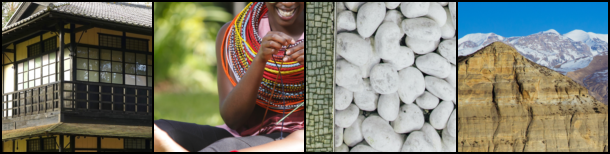

In [9]:
# Low Res
inputs, target = next(iter(dataloaders['train']))
transforms.ToPILImage()(torchvision.utils.make_grid(inputs))

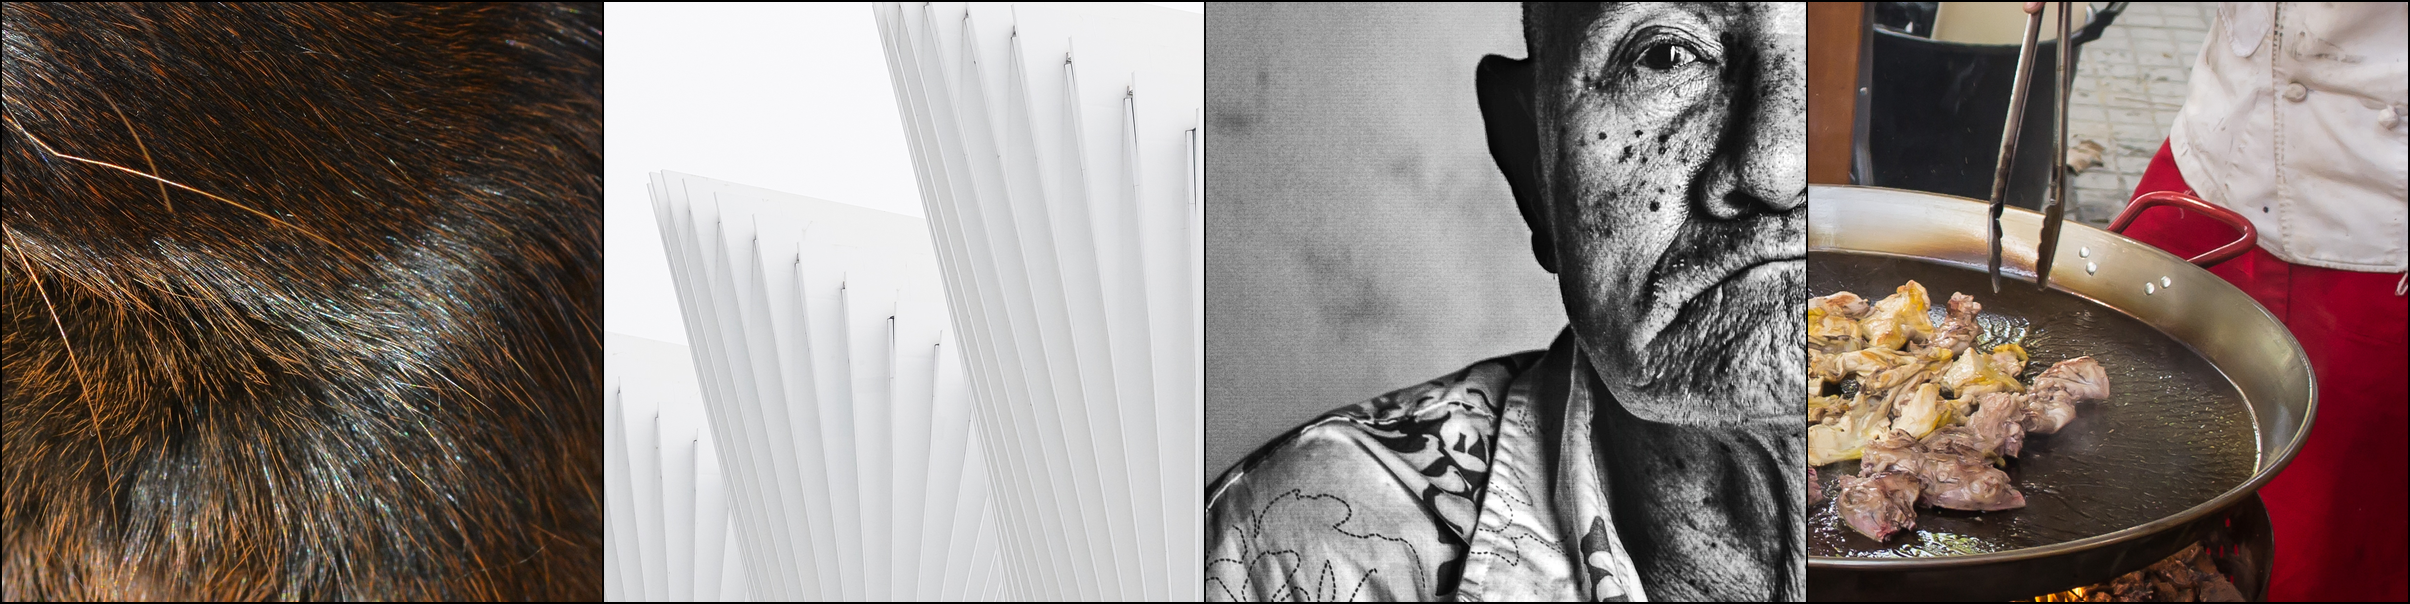

In [8]:
# High Res
transforms.ToPILImage()(torchvision.utils.make_grid(target))

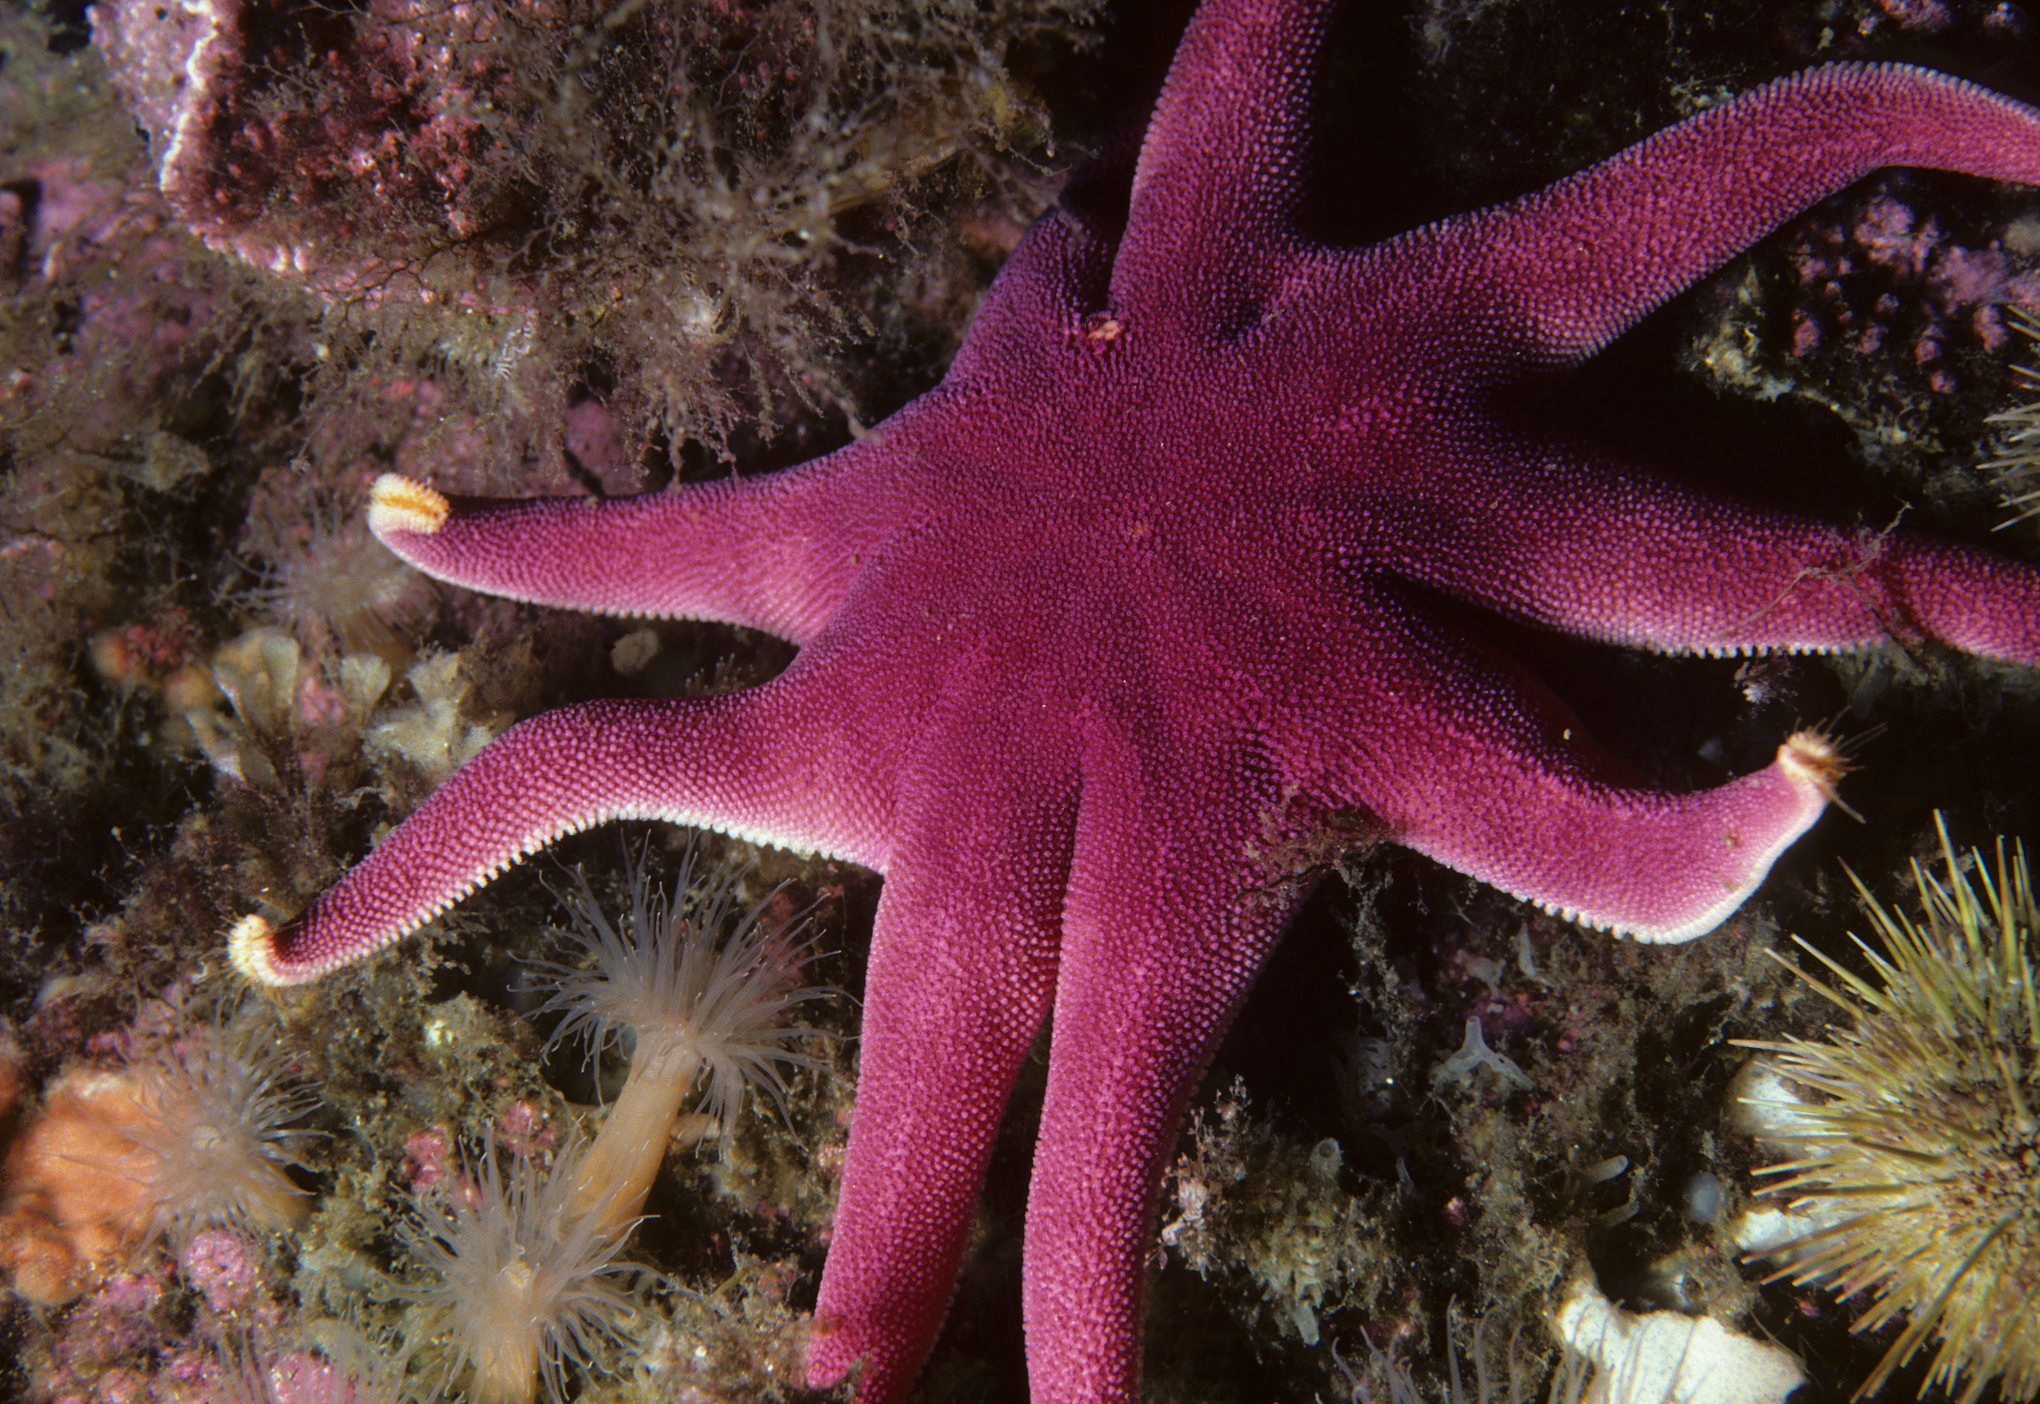

In [13]:
img = Image.open('/home/hacker/Documents/Super-Resolution/datasets/DIV2K/DIV2K_train_HR/0001.png')
img

In [30]:
images = transform = transforms.Compose([
   transforms.FiveCrop(1000), # this is a list of PIL Images
   transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])) # returns a 4D tensor
])(img)

In [13]:
for i, data in enumerate(dataloaders['train']):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
